# Chapter 6: knn

In [1]:
%reset
low_memory=False

import pandas as pd
import matplotlib.pyplot as plt
import imblearn

import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 6.1 Introduction & Motivation

Now that we've seen two classification models, it's time to add a third one: knn or *k nearest neighbours*. This model essentials works based on one single question: **When looking at the *k* datapoints closest to me, which label occurs the most?**

This model is easy to understand but can be tricky to tune, especially when it comes to finding the best value for k. In this excercise you will put the model to the test, compare it to the ones you already know and explore new ways to get the best evaluation!

## 6.2 Problem Setting

After a war, often dangerous equipement gets left behind scattered around a field. Over time these can become buried in the earth and lost to time. However, at some point later in time civilians sometimes find still live explosives leading to dangerous situations. Over here in flanders for example, to this day farmers still find live mines from WW 1 when plowing their fields.

To combat this and take out as many of them as possible, a government can take some sonar scans of the ground. The dataset that we are going to explore today contains a series of object, each scanned 60 times with a sonar from different angles. We are trying to predict whether a scanned object is an actual mine 'M' or a rock shaped like a mine 'R'. These values are stored in the 'Material' column.

## 6.3 Model

First, let's have a look at the data.

In [2]:
df = pd.read_csv("Sonar.csv")
df.head()

,Sonar1,Sonar2,Sonar3,Sonar4,Sonar5,Sonar6,Sonar7,Sonar8,Sonar9,Sonar10,...,Sonar52,Sonar53,Sonar54,Sonar55,Sonar56,Sonar57,Sonar58,Sonar59,Sonar60,Material
0,0.0664,0.0575,0.0842,0.0372,0.0458,0.0771,0.0771,0.1130,0.2353,0.1838,...,0.0141,0.0190,0.0043,0.0036,0.0026,0.0024,0.0162,0.0109,0.0079,R
1,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067,M
2,0.0201,0.0178,0.0274,0.0232,0.0724,0.0833,0.1232,0.1298,0.2085,0.2720,...,0.0131,0.0049,0.0104,0.0102,0.0092,0.0083,0.0020,0.0048,0.0036,M
3,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208,M
4,0.0261,0.0266,0.0223,0.0749,0.1364,0.1513,0.1316,0.1654,0.1864,0.2013,...,0.0222,0.0175,0.0127,0.0022,0.0124,0.0054,0.0021,0.0028,0.0023,M


##### Question 1: Try and plot a heatmap to further explore the data. Do you run into any errors? Why is this? How can you solve this using a method we've already seen?

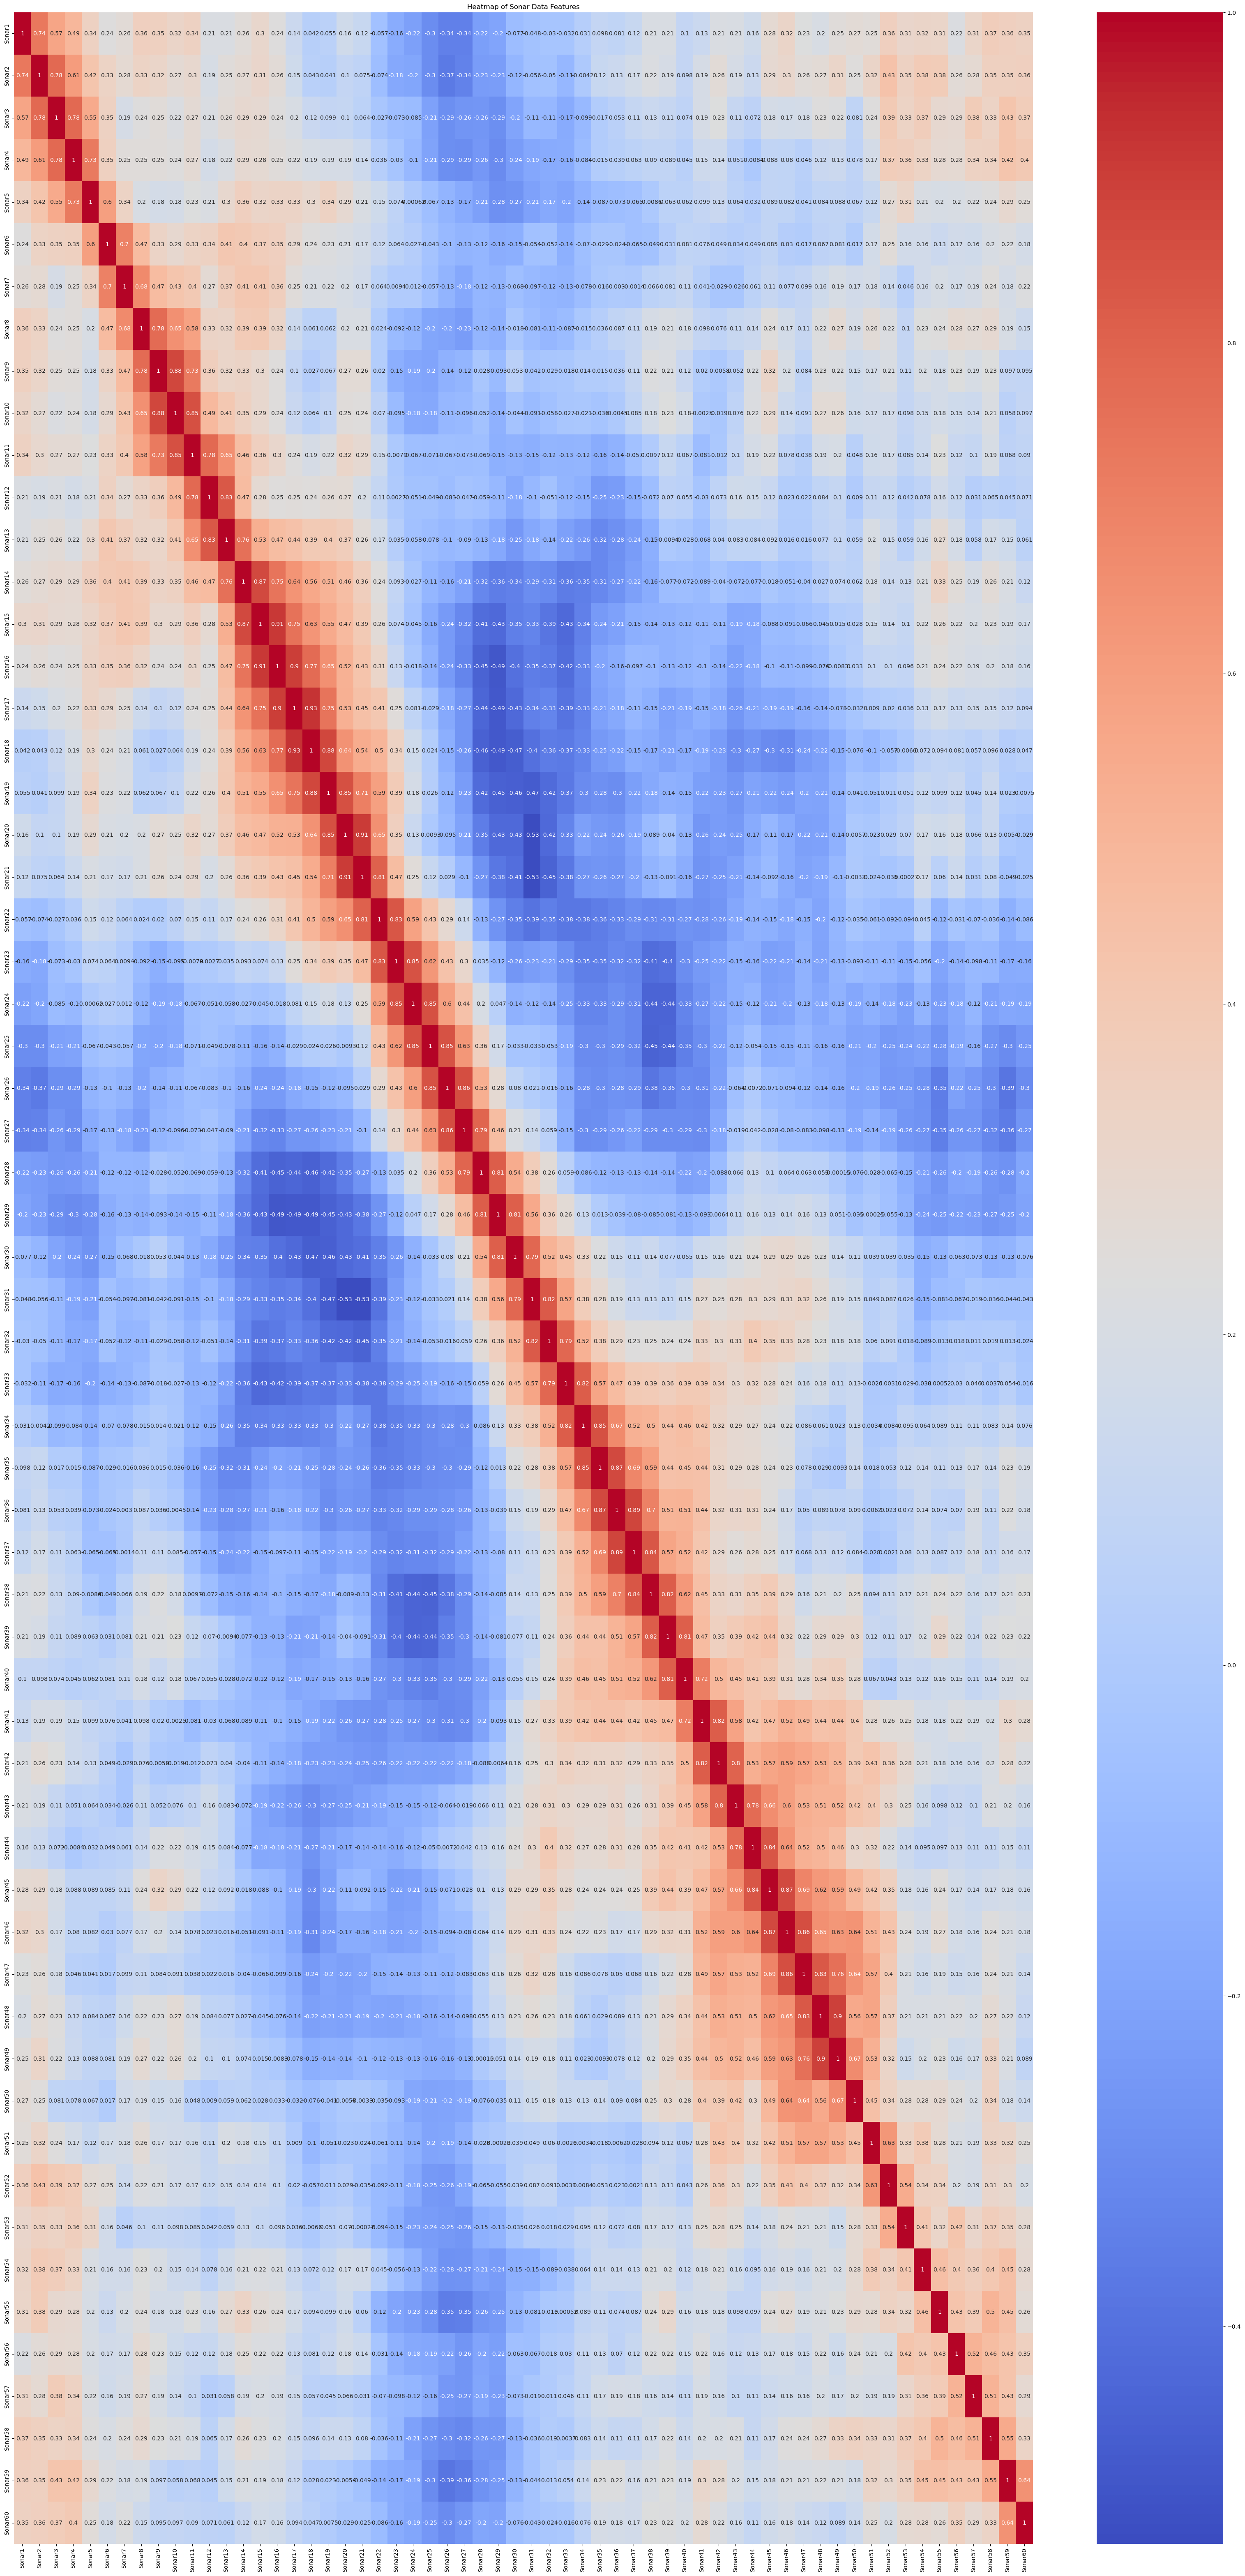

In [3]:

sonar_df = pd.read_csv('Sonar.csv')
X = sonar_df.drop('Material', axis=1)  
y = sonar_df['Material']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

plt.figure(figsize=(40, 80))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Sonar Data Features')
plt.show()



##### Question 2: Just as always, explore the data by looking at the heatmap. Which variables would you expect to have the highest impact on quality and which ones would you expect to have the lowest impact? Why?

#### High-frequency:
readings (perhaps sonar values toward the higher indices like Sonar50 to Sonar60) might have higher impact, as mines might have distinctive reflections at higher frequencies.
#### Low-frequency: 
readings or variables that are uncorrelated with others may have a lower impact. These could represent noise or readings that do not contribute meaningfully to the classification task.

##### Question 3: Build and train your model. Make sure to keep some data on the side for testing and to exclude your final column in your training data!

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

##### Question 4: Predict the materials of your testing data. How many rocks are there? And how many mines?

In [6]:

y_pred =neigh.predict(X_test)

num_rocks = sum(y_pred == 'R')
num_mines = sum(y_pred == 'M')

print(f"Number of Rocks predicted: {num_rocks}")
print(f"Number of Mines predicted: {num_mines}")


Number of Rocks predicted: 20
Number of Mines predicted: 32


## 6.4 Model Evaluation

Of course our predictions don't mean anything without knowing how good they are. Let's explore this.

##### Question 5: Is your model any good? Elaborate by calculation accuracy and precision.

In [7]:
predictions = neigh.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
predictions = neigh.predict(X_test)
precision =precision_score(y_test,predictions,average='weighted')
print(f"Precision: ",precision)
print(f"Accuracy: ",accuracy)

Precision:  0.7415865384615384
Accuracy:  0.6923076923076923


##### Precision (0.74): 
Model predicts positive class, it's correct  74% of the time. fairly good, espacially if false positives are costly in my model.
#### Accuracy (0.69):
An accuracy of 0.69% means the model correctly classifies 69% of instances, which is reasonable but could be improved, depending on my model.

##### Question 6: Can you visually confirm your previous findings by plotting a confusion matrix?

In [8]:
from sklearn.linear_model import LogisticRegression
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[19  3]
 [13 17]]


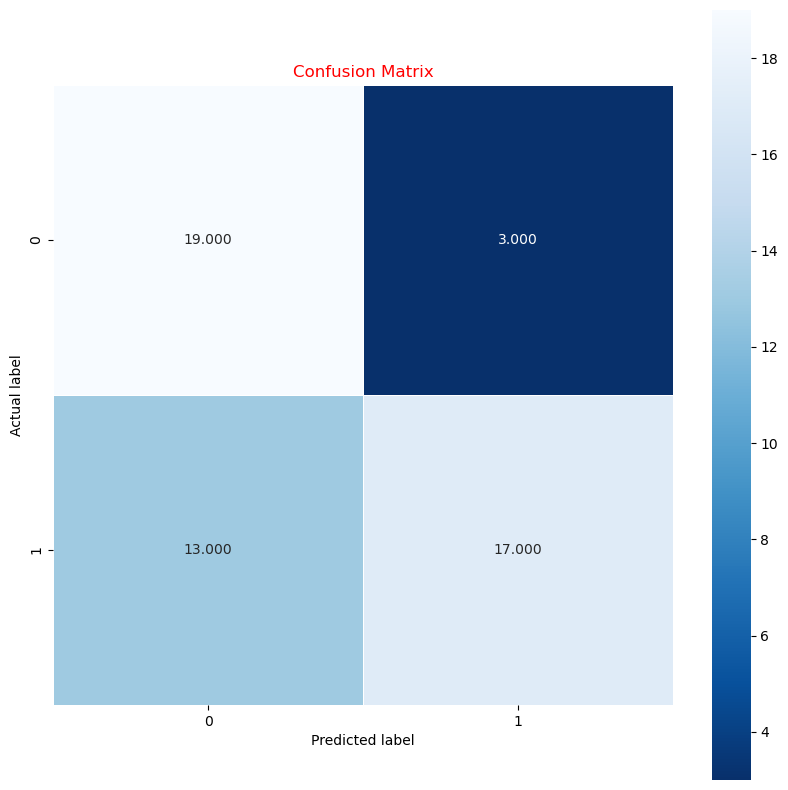

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix',color='red')
plt.show()

##### Question 7: Calculate the other methods we've seen. Are they any good? Elaborate. In the current dataset, would you prefer a high recall or specificity? Why?
*Remember that we are working with a binary solution, not a multiclass solution!*

In [14]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)
tree = DecisionTreeClassifier()
tree_fit = tree.fit(X_train, y_train)

In [11]:

# For lofisticRegration

logistic_pred = logisticRegr.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred, pos_label='M')  
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_specificity = logistic_cm[0, 0] / (logistic_cm[0, 0] + logistic_cm[0, 1])

#For decision Tree 

tree_pred = tree_fit.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred, pos_label='M')
tree_cm = confusion_matrix(y_test, tree_pred)
tree_specificity = tree_cm[0, 0] / (tree_cm[0, 0] + tree_cm[0, 1])
#For K-nearest-neighbors

knn_pred = neigh.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred, pos_label='M')
knn_cm = confusion_matrix(y_test, knn_pred)
knn_specificity = knn_cm[0, 0] / (knn_cm[0, 0] + knn_cm[0, 1])

print(f"Logistic Regression\n Accuracy: {logistic_accuracy}\n Recall: {logistic_recall}\n Specificity: {logistic_specificity}")
print(f"Decision Tree\n Accuracy: {tree_accuracy}\n Recall: {tree_recall}\n Specificity: {tree_specificity}")
print(f"K Nearest neighbors \n Accuracy: {knn_accuracy}\n Recall: {knn_recall}\n Specificity: {knn_specificity}")


Logistic Regression
 Accuracy: 0.75
 Recall: 0.8181818181818182
 Specificity: 0.8181818181818182
Decision Tree
 Accuracy: 0.6538461538461539
 Recall: 0.6818181818181818
 Specificity: 0.6818181818181818
K Nearest neighbors 
 Accuracy: 0.6923076923076923
 Recall: 0.8636363636363636
 Specificity: 0.8636363636363636


## 6.5 Questions

##### Question 1: See section 6.3

##### Question 2: See section 6.3

##### Question 3: See section 6.3

##### Question 4: See section 6.3

##### Question 5: See section 6.4

##### Question 6: See section 6.4

##### Question 7: See section 6.4

##### Question 8: By default, python will use 5 as the amount of nearest neighbours. Try and find the best value by plotting a series of possible values.

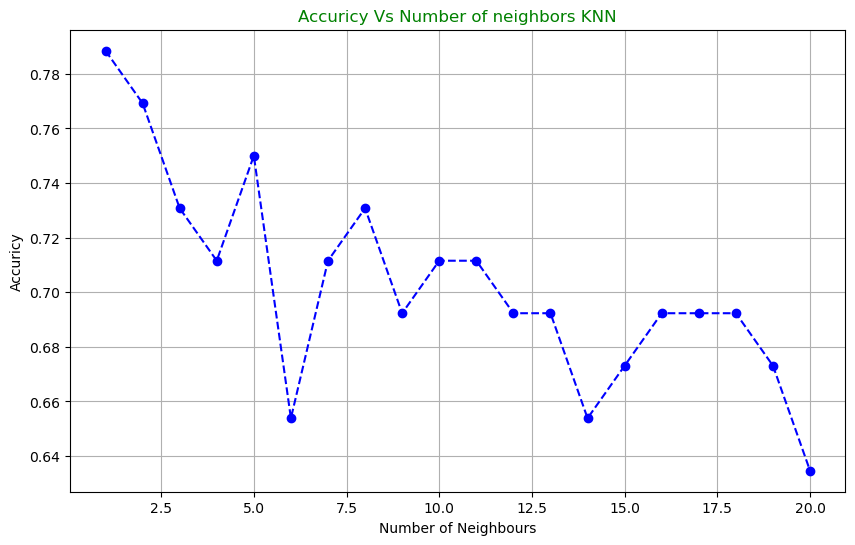

In [12]:
accuricies =[]
ne =range(1,21)
for n_neighbors in ne:
    KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(X_train, y_train)
    predictions = KNN.predict(X_test)
    accuracy =accuracy_score(y_test,predictions)
    accuricies.append(accuracy)
    
plt.figure(figsize=(10,6))
plt.plot(ne,accuricies,marker='o',linestyle='--',color='b')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuricy')
plt.title('Accuricy Vs Number of neighbors KNN',color='green')
plt.grid(True)
plt.show()
    

##### Question 9: Do the same for the metric you want to maximize. Does your preferred value for n change? Which value would be 'best' in the end for this data?

In [13]:
from sklearn.metrics import accuracy_score, f1_score
neighbour_range=[1,3,5,7,9,11,13,15,17,19]
result =[]
for n_neighbors in neighbour_range:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred,average='weighted')
    result.append((n_neighbors,accuracy,f1))
for n_neighbors, accuracy,f1 in result:
    print(f"n_neighbors:{n_neighbors}, Accuracy:{accuracy:.4f}, F1 scrore:{f1:.4f}")
    
best_accuracy =max(result,key=lambda x: x[1])
best_f1=max(result,key=lambda x: x[2])

print(f"\nBest by Accuracy: n_neighbors={best_accuracy[0]},Accuracy={best_accuracy[1]:.4f}")
print(f"\nBest by F1 score: n_neighbors={best_f1[0]},Accuracy={best_f1[2]:.4f}")

n_neighbors:1, Accuracy:0.7885, F1 scrore:0.7896
n_neighbors:3, Accuracy:0.7308, F1 scrore:0.7308
n_neighbors:5, Accuracy:0.7500, F1 scrore:0.7492
n_neighbors:7, Accuracy:0.7115, F1 scrore:0.7080
n_neighbors:9, Accuracy:0.6923, F1 scrore:0.6900
n_neighbors:11, Accuracy:0.7115, F1 scrore:0.7045
n_neighbors:13, Accuracy:0.6923, F1 scrore:0.6868
n_neighbors:15, Accuracy:0.6731, F1 scrore:0.6651
n_neighbors:17, Accuracy:0.6923, F1 scrore:0.6868
n_neighbors:19, Accuracy:0.6731, F1 scrore:0.6651

Best by Accuracy: n_neighbors=1,Accuracy=0.7885

Best by F1 score: n_neighbors=1,Accuracy=0.7896


##### Question 10: Train a logistic regression, decision trees and random forest model on this data. Try and find the best models you can using the methods we've explored in earlier lessons. Which model do you prefer?

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [45]:
accuracies_logistic= []
accuracies_tree= []
accuracies_rendaom =[]
accuracies_knn= []
for solver in ['lbfgs', 'saga', 'newton-cg']:
    for max_iter in [10, 100, 1000, 10000, 100000]:
        logistic=LogisticRegression(max_iter=max_iter, solver=solver)
        logistic.fit(X_train, y_train)
        accuracies_logistic.append(accuracy_score(y_test,logistic.predict(X_test)))

for x in range (1, 101):
    model = DecisionTreeClassifier(max_depth = x)
    model.fit(X_train, y_train)
    accuracies_tree.append(accuracy_score(y_test, model.predict(X_test)))
for x in range (1,100):
    randomForest=RandomForestClassifier(n_estimators=x, max_depth=10, random_state=42)
    randomForest.fit(X_train,y_train)
    accuracies_rendaom.append(accuracy_score(y_test,randomForest.predict(X_test)))
for x in range (1, 101):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(X_train, y_train)
    accuracies_knn.append(accuracy_score(y_test, neigh.predict(X_test)))

print('Logistic regration: ', max(accuracies_logistic))
print('Decision tree: ', max(accuracies_tree))
print('Random Forest: ', max(accuracies_rendaom))
print('Knn: ', max(accuracies_knn))

C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic regration:  0.75
Decision tree:  0.75
Random Forest:  0.8653846153846154
Knn:  0.7884615384615384


Accroding to the accuracy score of random forest is higher than the logistic Regression, decision tree and knn. In that case i would prefer the RandomForest model.

##### Question 11: It might just so happen that the test set we are using does not properly represent the whole dataset we have and thus might unfairly favor one model. A way to combat this is called cross validation. Do some research and implement this method using a 10-fold. Does the outcome you found above change?

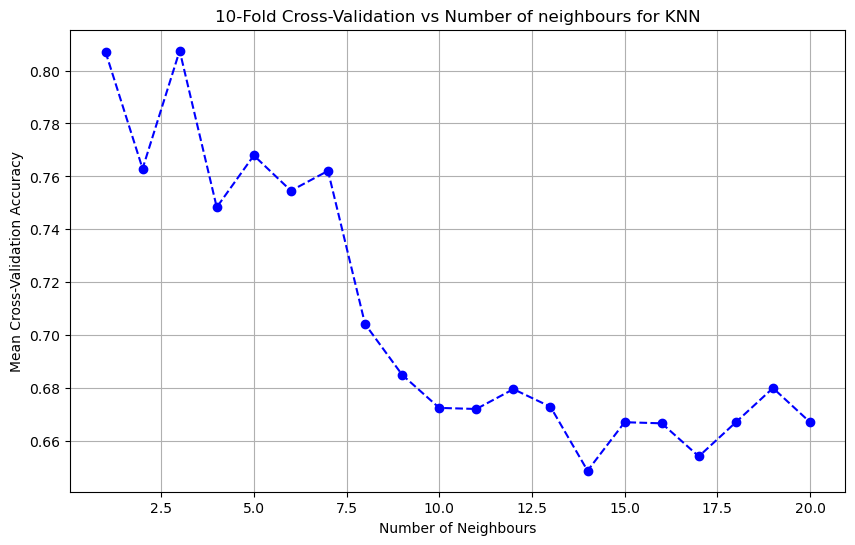

Beast n_neighbours on 10-fold cross validation:3
Hieght Mean cross-validation accuracy:0.8075


In [27]:
from sklearn.model_selection import cross_val_score
new_neighbours_range=range(1,21)
cv_accuracies =[]
for n in new_neighbours_range:
    KNN=KNeighborsClassifier(n_neighbors=n)
    scores=cross_val_score(KNN,X_train,y_train,cv=10,scoring='accuracy')
    cv_accuracies.append(scores.mean())
    
plt.figure(figsize=(10,6))
plt.plot(new_neighbours_range,cv_accuracies,marker='o',linestyle='--',color='b')
plt.xlabel('Number of Neighbours')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('10-Fold Cross-Validation vs Number of neighbours for KNN')
plt.grid(True)
plt.show()

best_value=new_neighbours_range[cv_accuracies.index(max(cv_accuracies))]
print(f'Beast n_neighbours on 10-fold cross validation:{best_value}')
print(f'Hieght Mean cross-validation accuracy:{max(cv_accuracies):.4f}')